<a href="https://colab.research.google.com/github/kuzovkov/neural-university/blob/main/%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_%7C_%D0%98%D0%BD%D1%82%D0%B5%D0%B3%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8_%D0%BD%D0%B0_%D0%94%D0%95%D0%9C%D0%9E_%D0%9F%D0%90%D0%9D%D0%95%D0%9B%D0%AC_(%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0)_%7C_%D0%A3%D0%98%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Содержание темы**

1. [Теория](https://colab.research.google.com/drive/1dGUwfG7Tv487_aV-WQo2sELtZizgVHKU?usp=sharing)

2. Практика


# Методы работы с сохранением / загрузкой весов и архитектуры модели нейронной сети

Для формирования модели нейронной сети создайте пустой контейнер **model** - экземпляр класса **Sequential**. Он содержит все методы класса, четыре из которых помогают сохранять и загружать как веса модели, так и полную архитектуру модели.

Часто нейронная сеть долго обучается, и чтобы не начинать все заново, можно сохранять веса модели или всю модель на промежуточных этапах. Это дает возможность в любой момент приостановить обучение, а затем продолжить с момента сохранения.

Если вы обучили сеть до требуемого уровня и хотите использовать ее в рабочем проекте, то можете записать финальную модель в файл после обучения.

---
Разница между ***сохранением модели*** `model.save()` и ***сохранением весов модели*** `model.save_weights()` заключается в том, что именно будет сохранено и как это можно использовать потом:
* ***сохранение весов модели*** `model.save_weights()` сохраняет в файл только значения весов модели, но не ее архитектуру (слои, нейроны, активации). Поэтому для использования сохраненных весов необходимо пересоздать архитектуру модели, загрузить в нее веса, скомпилировать, и только после этого можно использовать модель. Такой метод удобен, если модель не меняется, и нужно сохранить лучший результат или вернуться к более раннему этапу обучения модели.
* ***сохранение модели*** `model.save()` сохраняет модель полностью вместе с ее архитектурой, весами, состоянием оптимизатора и прочими параметрами. Для использования достаточно только загрузить модель. Этот метод удобен при поиске оптимальной архитектуры нейронной сети. Если сохранять только веса модели, то можно потерять информацию о лучшей ее архитектуре в процессе поиска.

Для примера вы создадите элементарную модель, на вход подадите случайные данные и попробуете два варианта сохранения.

In [1]:
# Загрузка библиотек

from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Генерация случайных данных с размером пакета 20

X_train = np.random.random(size=(20, 8))   # Создание массива со случайными элементами формой (20, 8)
Y_train = np.random.random(size=(20, 1))   # Создание массива со случайными элементами формой (20, 1)

print(X_train.shape, Y_train.shape)        # Вывод на экран формы массивов

(20, 8) (20, 1)


In [3]:
# Сборка слоев в простую модель

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Проверьте форму входных данных и архитектуру модели:

In [4]:
print(f'Форма входных данных: {model.input_shape}\n\n')

model.summary()

Форма входных данных: (None, 8)




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

Обучите модель на случайных данных в течение нескольких эпох:

In [5]:
# Компиляция и обучение модели

model.compile(loss='binary_crossentropy')
model.fit(X_train, Y_train, epochs=3)

Epoch 1/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7113
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - loss: 0.7077
Epoch 3/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.7055


## Сохранение только весов или модели полностью

Важно определиться, в какую директорию вы сохраните файл с весами модели:
- если вы укажете просто имя файла с расширением **.h5** (общепринятое для моделей и весов Keras), файл сохранится в дереве файлов и будет жить, пока активна текущая сессия Colab. Не самый лучший вариант: любой сбой системы и перезапуск лишат вас результатов проделанной работы.
- вы можете сохранить модель на своем google-диске. Для этого нужно подключить google-диск к colab, а затем выполнить сохранение с указанием полного пути к файлу с правильным маршрутом к google-диску.

Для примера воспользуемся здесь первым вариантом.


In [10]:
# Имя и желаемый путь к будущему файлу

path_weight = 'test.weights.h5'

Используйте методы объекта-модели для сохранения:

In [11]:
# сохранение весов модели

model.save_weights(path_weight)

In [12]:
# сохранение архитектуры модели и ее весов

model.save('model.h5')

Проверьте в дереве файлов, что все сохранилось как надо:

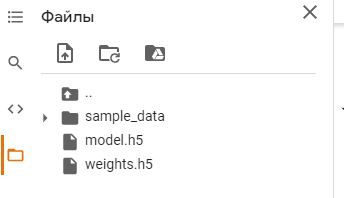

## Загрузка только весов или модели полностью

Чтобы было куда загружать веса, нужно сначала создать модель такой же архитектуры.


In [13]:
model.load_weights(path_weight)  # загрузка весов
print('Веса загружены!')

Веса загружены!


Для загрузки модели целиком импортируйте функцию `load_model()` из модуля **tensorflow.keras.models**. Эта функция принимает в качестве аргумента путь к файлу, а возвращает загруженную модель:

In [14]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')
print('Модель и веса загружены!')

Модель и веса загружены!


Убедитесь, что архитектура модели восстановлена полностью:

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223 (896.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Готовую модель можно запускать на центральном процессоре **CPU**, что требует меньших ресурсов. Графический ускоритель **GPU** используется лишь для обучения.


# Создание сверточной нейросети и ее сохранение

Рассмотрим создание модели и сохранение ее весов и архитектуры на более сложном примере. Это сверточная сеть для классификации стандартного набора **Cifar10**.

---

**Важно!** Для ускорения обучения модели стоит переключиться на **GPU** в верхнем меню Colab:

    Среда выполнения --> Сменить среду выполнения --> Аппаратный ускоритель

---

Начните с загрузки базы изображений и ее конвертации в нужный формат:

In [16]:
from tensorflow.keras.datasets import cifar10

# Загрузка cifar10
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [17]:
# Размер изображения 32 x 32, 3 канала (цветное)

x_train10.shape

(50000, 32, 32, 3)

In [18]:
# Определение названий классов в порядке, установленном в описании набора данных

classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [19]:
# Нормирование изображений

x_train10 = x_train10 / 255.
x_test10 = x_test10 / 255.

In [20]:
# Перевод меток класса y_train и y_test в формат one hot encoding

from tensorflow.keras import utils

# Число категорий в to_categorical() можно не указывать - инструмент определит его по данным
y_train10 = utils.to_categorical(y_train10)
y_test10 = utils.to_categorical(y_test10)

In [21]:
# Проверка формы получившихся выборок

print(x_train10.shape)
print(x_test10.shape)
print(y_train10.shape)
print(y_test10.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


Задайте размер пакета:

In [22]:
batch_size = 128

Создайте архитектуру модели:

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [24]:
model = Sequential()

model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Проверьте созданную архитектуру модели:

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 32, 32, 3)           │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,341,622 (5.12 MB)

 Trainable params: 1,341,424 (5.12 MB)

 Non-trainable params: 198 (792.00 B)

Скомпилируйте модель, задав оптимизатор, функцию ошибки и метрики для проверки. Затем обучите модель на подготовленных выборках и выведите график точности обучения:



---

**Обратите внимание**

Далее идет код обучения нейронной сети. Вы можете пропустить этот этап и перейти к ячейке загрузки весов модели

---



Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.2612 - loss: 2.0282 - val_accuracy: 0.2006 - val_loss: 2.1711
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.4560 - loss: 1.4775 - val_accuracy: 0.5184 - val_loss: 1.3089
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5220 - loss: 1.3172 - val_accuracy: 0.5657 - val_loss: 1.2119
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5702 - loss: 1.1844 - val_accuracy: 0.6061 - val_loss: 1.1023
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6167 - loss: 1.0796 - val_accuracy: 0.6435 - val_loss: 1.0158
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6437 - loss: 1.0020 - val_accuracy: 0.6681 - val_loss: 0.9337
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6667 - loss: 0.9360 - val_accuracy: 0.6786 - val_loss: 0.9018
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6915 - loss: 0.87

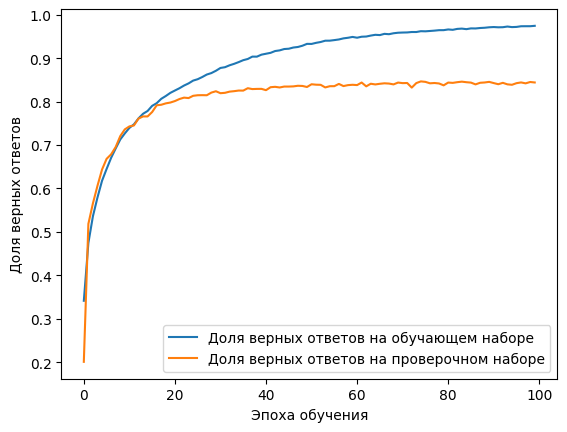

In [26]:
from tensorflow.keras.optimizers import Adam

model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

history = model.fit(x_train10,
                    y_train10,
                    batch_size=batch_size,
                    epochs=100,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

# Вывод графика точности обучения

import matplotlib.pyplot as plt # -------- отрисовка графиков

plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Сохраните всю модель (архитектуру и веса) после обучения:

In [27]:
# Сохранение обученной модели полностью (веса и архитектура) после всех эпох

model.save('model_fmr_all.h5')

**загрузка весов модели с сервера**

Если вы пропустили этап обучения модели, то можете загрузить веса модели с нашего сервера:

In [ ]:
import gdown
# Загрузка датасета из облака
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l6/model_fmr_all.h5', None, quiet=True)

'model_fmr_all.h5'

# Запуск готовой модели

Чтобы можно было воспользоваться результатами обучения нейронки, необходимо провести подготовительные работы. В этом помогут изученные ранее функции и модули.

Загрузите сохраненную модель в переменную **model**:

In [28]:
from tensorflow.keras.models import load_model

model = load_model('model_fmr_all.h5')

Подготовьте тестовую картинку для подачи в модель:

In [30]:
# Загрузка тестовых изображений 10 классов

import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/knowledge/test_images.zip', None, quiet=True)

'test_images.zip'

In [31]:
# Распаковка архива

!unzip -qo test_images.zip

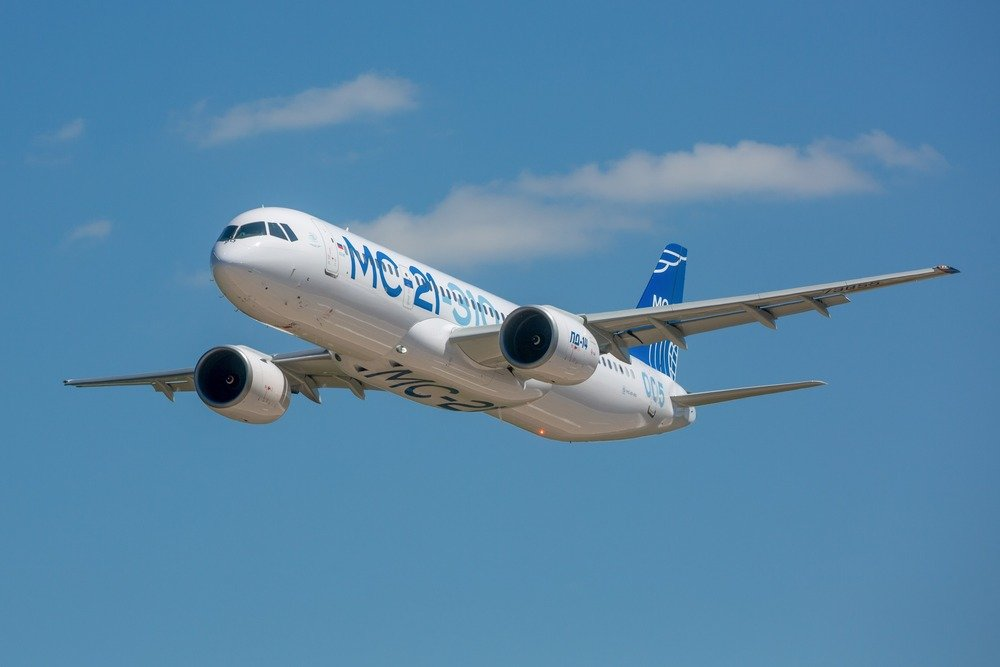

In [32]:
# Просмотр тестового изображения

from PIL import Image

# Путь к файлу изображения
test_path = '/content/test_images/1.jpg'
img = Image.open(test_path)

# Вывод изображения на экран
display(img)

Задайте требуемый для модели размер изображения:

In [33]:
# Требуемый для модели размер изображения
img_width, img_height = 32, 32

Подготовьте тестовое изображение для подачи в модель.

Для наглядного расположения выводимой информации воспользуемся строковым методом `.format()`, задав выравнивание влево для имени класса и процентное представление вероятности принадлежности картинки к классу.

Для извлечения индексов класса применим встроенную функцию `enumerate()`, которая вернет не только элементы списка (имена классов), но и их индексы. Для всех классов это удобно сделать в цикле:
```
for i, cl in enumerate(classes):
```


---
Дополнительная информация: ([База знаний УИИ - «**Функция enumerate()**»](https://colab.research.google.com/drive/1r_5MjiYsrzqgk4hO8UpqKfQV1NDpdkoM?usp=sharing))

---

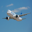

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step
Результат распознавания:
самолет       100.00%
автомобиль     0.00%
птица          0.00%
кот            0.00%
олень          0.00%
собака         0.00%
лягушка        0.00%
лошадь         0.00%
корабль        0.00%
грузовик       0.00%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Изображен(а):  самолет


In [34]:
# Подготовка изображения для подачи в модель НС

import numpy as np

# Открытие картинки и изменение ее размера для соответсвия входу модели
img = Image.open(test_path).resize((img_width, img_height))

# Проверка результата
display(img)

# Преобразование картинки в numpy-массив чисел с плавающей запятой и нормализация значений пикселей
image = np.array(img, dtype='float64') / 255.

# добавление оси для совпадения формы входа модели; получается батч из одного примера
image = np.expand_dims(image, axis=0)

# Распознавание изображения нейросетью

pred = model.predict(image)
print('Результат распознавания:')

for i, cl in enumerate(classes):
    # Вывод предсказания сети для каждого класса
    print('{:<14s}{:6.2%}'.format(cl, pred[0, i]))
print()

# Вычисление индекса класса с максимальным значением вероятности и вывод имени класса
cls_image = np.argmax(model.predict(image))
print('Изображен(а): ', classes[cls_image])

# Запуск модели на демо-панели

Итак, у вас есть почти все необходимое для размещения модели нейронной сети на демо-панели. Осталась лишь пара штрихов.

Вначале создадим скрипт, который реализует распознавание изображения.

---

**ВАЖНЫЕ МОМЕНТЫ в задании главной функции скрипта:**

*   она должна иметь имя **predict**, так как сервер демо-панели будет вызывать функцию именно с таким именем;
*   она должна иметь первый обязательный аргумент **img_path** - путь к тестовому изображению на сервере демо-панели;
*   она должна иметь второй обязательный аргумент **model_path** - путь к модели на сервере демо-панели;
*   в скрипте должны быть импортированы все необходимые библиотеки для запуска модели, открытия и подготовки изображения.

---

В итоге скрипт может иметь примерно следующий вид:

In [35]:
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

def predict(img_path='./test_image_1.jpg', model_path='./model_fmr_all.h5'):
    classes = {0: 'самолет',
               1: 'автомобиль',
               2: 'птица',
               3: 'кот',
               4: 'олень',
               5: 'собака',
               6: 'лягушка',
               7: 'лошадь',
               8: 'корабль',
               9: 'грузовик'}

    model = load_model(model_path)

    img_width, img_height = 32, 32

    img = Image.open(img_path).resize((img_height, img_width))
    image = np.array(img, dtype='float64') / 255

    image = np.expand_dims(image, axis=0)
    cls_image = np.argmax(model.predict(image))

    print(classes[cls_image])

Попробуйте вызвать функцию `predict()` в ячейке Colab:

In [36]:
predict(img_path='test_images/5.jpg', model_path='model_fmr_all.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
олень


На пятой картинке в тестовой папке дейстительно изображен **олень**:

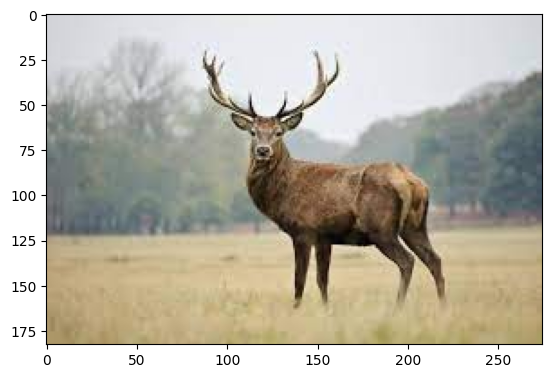

In [37]:
plt.imshow(Image.open('test_images/5.jpg'))
plt.show()

Теперь создадим текстовый файл с расширением **.py** и запишем в него созданный выше код (это и будет скрипт для демо-панели):

In [38]:
# Сохранение кода скрипта в переменной text_code

text_code = '''
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

def predict(img_path='./test_image_1.jpg', model_path='./model_fmr_all.h5'):
    classes = {0: 'самолет',
               1: 'автомобиль',
               2: 'птица',
               3: 'кот',
               4: 'олень',
               5: 'собака',
               6: 'лягушка',
               7: 'лошадь',
               8: 'корабль',
               9: 'грузовик'}

    model = load_model(model_path)

    img_width, img_height = 32, 32

    img = Image.open(img_path).resize((img_height, img_width))
    image = np.array(img, dtype='float64') / 255

    image = np.expand_dims(image, axis=0)
    cls_image = np.argmax(model.predict(image))

    print(classes[cls_image])

'''

# Запись содержимого переменной в файл скрипта

with open('script.py', 'w') as f:  # Создание / открытие файла
    f.write(text_code)             # Запись в файл значения переменной text_code

Следующим шагом подберем десять различных изображений, соответствующих классам датасета. Эти десять изображений будут отображаться на странице демо-панели в качестве пресетов. Загрузим их в директорию Colab под порядковыми номерами классов.

Вы можете взять абсолютно любые 10 изображений.

Здесь возьмем для этих целей файлы из тестовой папки:

In [39]:
# Библиотека для работы с файлами
from shutil import copyfile

for i in range(1, 11):
    copyfile(f'/content/test_images/{i}.jpg', f'/content/{i}.jpg')

В результате у вас должна получиться следующая структура файлов:

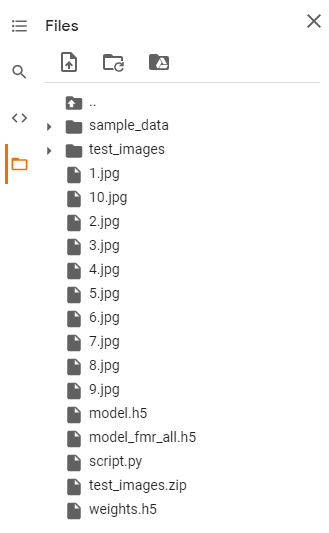

Далее создадим текстовый файл **label.txt** с именами классов, распознаваемых моделью. Алгоритм аналогичный: сначала создаем текстовую переменную с именами классов, затем записываем текст в файл:

In [40]:
label_txt = '''

самолет
автомобиль
птица
кот
олень
собака
лягушка
лошадь
корабль
грузовик

'''

with open('label.txt', 'w') as f:  # Создание / открытие файла
    f.write(label_txt.strip())     # Запись в файл значения переменной

Осталось упаковать все файлы в один архив для отправки на сервер.

Это можно сделать вручную; в ячейке ниже показано, как процесс может быть запрограммирован на **Python**.

---

**Важно!** Перед запуском следующей ячейки кода убедитесь, что все необходимые файлы присутствуют в каталоге **/content**!
- сохраненная модель **model_fmr_all.h5**;
- скрипт **script.py** с функцией `predict()`;
- текстовый файл **label.txt** с именами классов;
- **10** изображений.

---


In [41]:
import os
from zipfile import ZipFile as Zip             # Модуль для работы с zip-архивами

# Список всех файлов
integrate_files = ['model_fmr_all.h5', 'script.py', 'label.txt', *[f'{i}.jpg' for i in range(1, 11)]]

zipArchive = Zip('/content/archive.zip', 'w')  # Открытие файла, если такого не существует - будет создан новый

for file in integrate_files:                   # Для всех всем нужных файлов:
    if os.path.exists(file):                   # Если файл существует,
        zipArchive.write(file)                 # то добавление его в архив
    else:
        print(f'Файл {file} отсутствует!')     # иначе вывод на экран названия отсутствующего файла

zipArchive.close()                             # В финале архив следует закрыть, как и обычный файл

Скачайте готовый Zip-архив себе на компьютер, чтобы далее отправить его на сервер:

In [42]:
from google.colab import files               # Функция для скачивания данных на локальный компьютер

files.download(filename='archive.zip')       # Скачивание готового архива

print('Архив загружен')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Архив загружен


## Загрузка собранного архива на страницу распознавания



Перейдите по ссылке:

[Загрузить архив на демо-панель](https://srv1.demo.neural-university.ru/autodeploy.html)

1.   На странице введите свое *Имя* и *Фамилию* в соответствующие поля;
2.   Нажмите на кнопку **Выберите файл** и выберите архив на своем компьютере;
3.   Нажмите на кнопку **Загрузить**;
4.   После завершения загрузки откроется ваша персональная страница с работющей моделью нейронной сети!





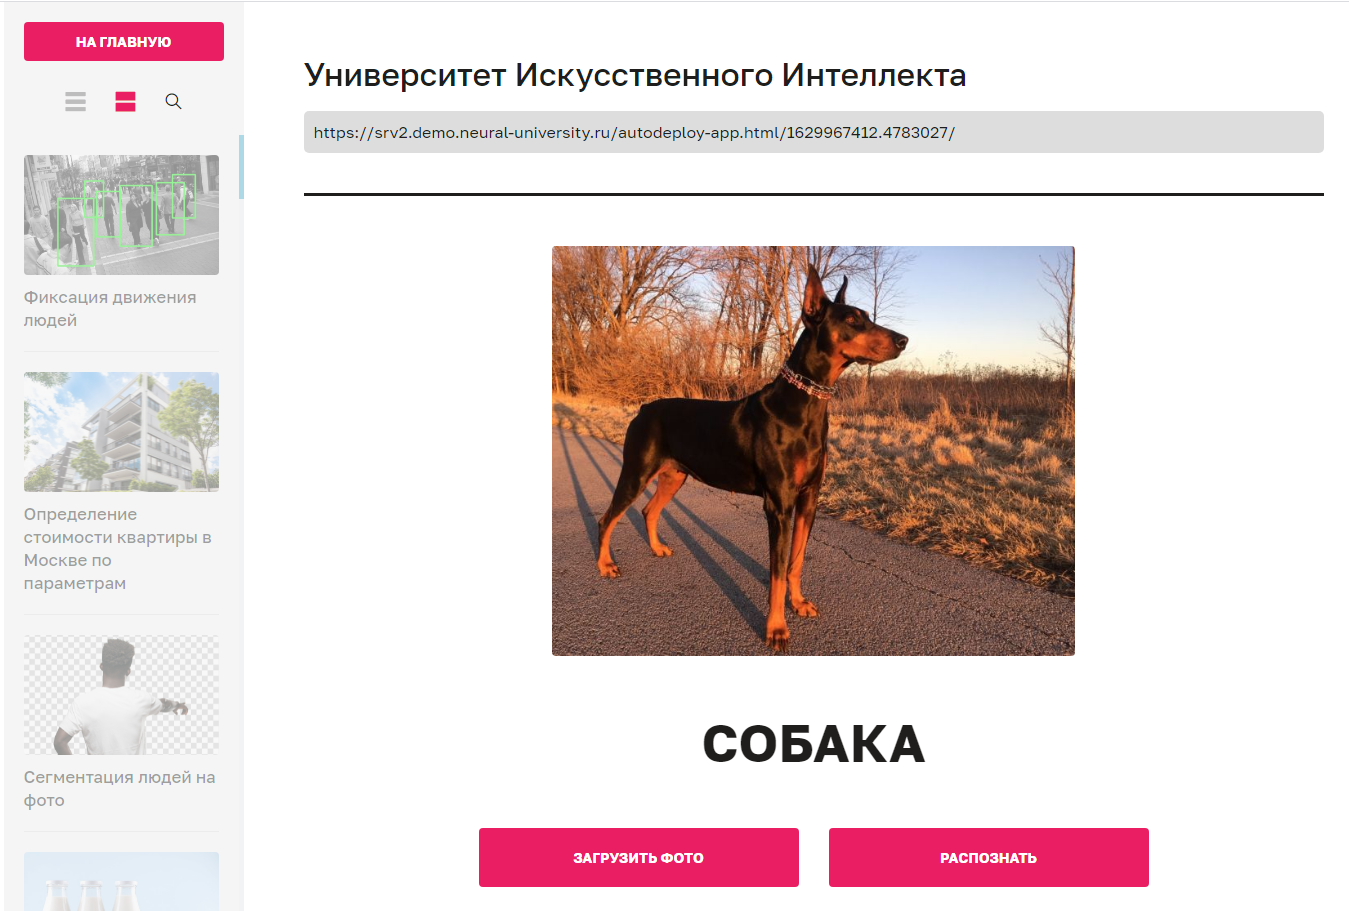

Вы можете проверить работу своей мадели на готовых пресетах (10 изображений), а можете загрузить любую произвольную картинку с помощью кнопки **"Загрузить фото"**.

---

**Важно**! Созданные вами страницы будут доступны на протяжении двух дней, после чего будет автоматически удалены.

---

**Содержание темы**

1. [Теория](https://colab.research.google.com/drive/1dGUwfG7Tv487_aV-WQo2sELtZizgVHKU?usp=sharing)

2. Практика
